In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: April 2025
# License: MIT

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

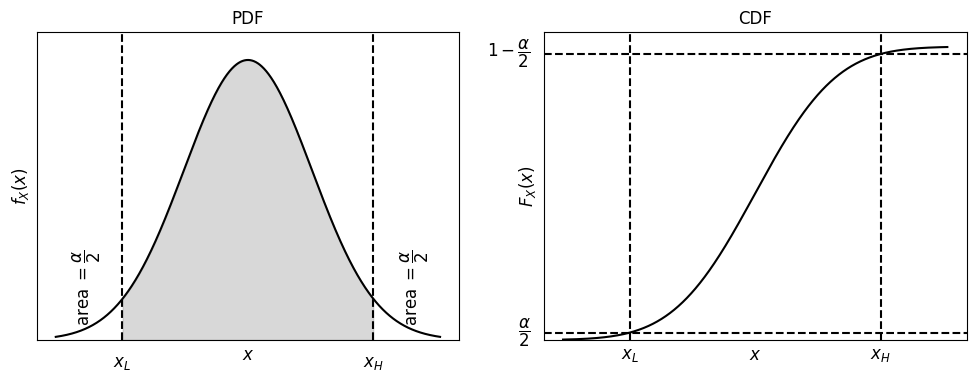

In [3]:
# Parameters
mu = 0
sigma = 1
alpha = 0.05
x = np.linspace(-3, 3, 1000)

# PDF and CDF
pdf = norm.pdf(x, loc=mu, scale=sigma)
cdf = norm.cdf(x, loc=mu, scale=sigma)

# Critical values
x_L = norm.ppf(alpha / 2, loc=mu, scale=sigma)
x_H = norm.ppf(1 - alpha / 2, loc=mu, scale=sigma)
y_L = alpha / 2
y_H = 1 - alpha / 2

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# PDF plot
axs[0].plot(x, pdf, color='black')
axs[0].fill_between(x, 0, pdf, where=(x >= x_L) & (x <= x_H), color='gray', alpha=0.3)
axs[0].axvline(x_L, linestyle='--', color='black')
axs[0].axvline(x_H, linestyle='--', color='black')
axs[0].text(x_L, -0.02, r"$x_L$", ha='center', va='top', fontsize=12)
axs[0].text(x_H, -0.02, r"$x_H$", ha='center', va='top', fontsize=12)
axs[0].text((x_L - 0.8), 0.02, r"area $= \dfrac{\alpha}{2}$", rotation=90, va='bottom', fontsize=12)
axs[0].text((x_H + 0.4), 0.02, r"area $= \dfrac{\alpha}{2}$", rotation=90, va='bottom', fontsize=12)
axs[0].set_title("PDF")
axs[0].set_xlabel("$x$", fontsize=12)
axs[0].set_ylabel("$f_X(x)$", fontsize=12)
axs[0].set_ylim(0, max(pdf) * 1.1)
axs[0].set_xticks([])
axs[0].set_yticks([])

# CDF plot
axs[1].plot(x, cdf, color='black')
axs[1].axvline(x_L, linestyle='--', color='black')
axs[1].axvline(x_H, linestyle='--', color='black')
axs[1].axhline(y_L, linestyle='--', color='black')
axs[1].axhline(y_H, linestyle='--', color='black')
axs[1].text(x_L, -0.02, r"$x_L$", ha='center', va='top', fontsize=12)
axs[1].text(x_H, -0.02, r"$x_H$", ha='center', va='top', fontsize=12)
axs[1].text(min(x)-0.5, y_L, r"$\dfrac{\alpha}{2}$", va='center', ha='right', fontsize=12)
axs[1].text(min(x)-0.5, y_H, r"$1 - \dfrac{\alpha}{2}$", va='center', ha='right', fontsize=12)
axs[1].set_title("CDF")
axs[1].set_xlabel("$x$", fontsize=12)
axs[1].set_ylabel("$F_X(x)$", fontsize=12)
axs[1].set_ylim(0, 1.05)
axs[1].set_xticks([])
axs[1].set_yticks([])

plt.savefig('figures/confidence_interval.pdf', bbox_inches='tight')

CI for the Mean of Normal Distribution (Known Variance vs. Unknown Variance)

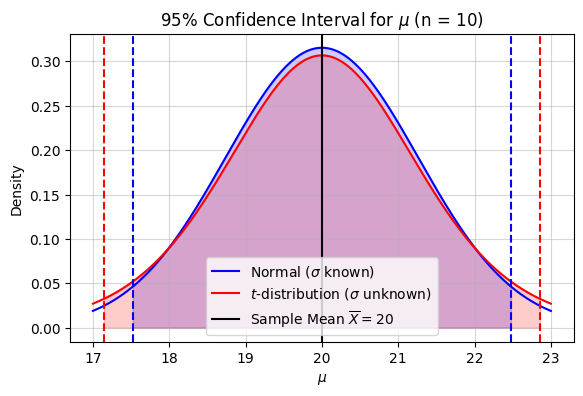

In [4]:
from scipy.stats import norm, t

# Parameters
n = 10
df = n - 1
mu_hat = 20
sigma = 4
alpha = 0.05

# Quantiles
z_alpha_2 = norm.ppf(1 - alpha / 2)
t_alpha_2 = t.ppf(1 - alpha / 2, df)

# Margins of error
margin_normal = z_alpha_2 * (sigma / np.sqrt(n))
margin_t = t_alpha_2 * (sigma / np.sqrt(n))

# Confidence intervals
ci_normal = (mu_hat - margin_normal, mu_hat + margin_normal)
ci_t = (mu_hat - margin_t, mu_hat + margin_t)

# Range for plotting
x = np.linspace(17, 23, 1000)
pdf_normal = norm.pdf(x, loc=mu_hat, scale=sigma / np.sqrt(n))
pdf_t = t.pdf((x - mu_hat) / (sigma / np.sqrt(n)), df) / (sigma / np.sqrt(n))

# Plot
plt.figure(figsize=(6.5, 4))
plt.plot(x, pdf_normal, label='Normal ($\sigma$ known)', color='blue')
plt.plot(x, pdf_t, label='$t$-distribution ($\sigma$ unknown)', color='red')
plt.axvline(ci_normal[0], color='blue', linestyle='--')
plt.axvline(ci_normal[1], color='blue', linestyle='--')
plt.axvline(ci_t[0], color='red', linestyle='--')
plt.axvline(ci_t[1], color='red', linestyle='--')
plt.axvline(mu_hat, color='black', linestyle='-', label='Sample Mean $\overline{X} = 20$')

plt.fill_between(x, pdf_normal, where=(x >= ci_normal[0]) & (x <= ci_normal[1]), color='blue', alpha=0.2)
plt.fill_between(x, pdf_t, where=(x >= ci_t[0]) & (x <= ci_t[1]), color='red', alpha=0.2)

plt.title('95% Confidence Interval for $\mu$ (n = 10)')
plt.xlabel('$\mu$')
plt.ylabel('Density')
plt.legend(loc='lower center')
plt.grid(alpha=0.5)
plt.savefig('figures/ci_normal_vs_t.pdf')